In [1]:
# !pip install neuron
# !pip install netpyne
import matplotlib

In [2]:
# rm -r netpyne-course-2021

In [3]:
# !git clone https://github.com/suny-downstate-medical-center/netpyne-course-2021.git
# !cd netpyne-course-2021

In [4]:
!nrnivmodl .

/home/fernando/Dropbox/Biestabilidade-HH/BistabilityHH/izhi
Mod files: "./izhi2003a.mod" "./izhi2003b.mod"

Creating x86_64 directory for .o files.

COBJS=''
 -> Compiling mod_func.c
gcc -O2   -I.   -I/home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 -> NMODL .././izhi2003a.mod
(cd "../."; MODLUNIT=/home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib /home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/bin/nocmodl izhi2003a.mod -o "/home/fernando/Dropbox/Biestabilidade-HH/BistabilityHH/izhi/x86_64")
 -> NMODL .././izhi2003b.mod
(cd "../."; MODLUNIT=/home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib /home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/bin/nocmodl izhi2003b.mod -o "/home/fernando/Dropbox/Biestabilida


 ---------------------------
  Threshold = -40.000000 mV 
 ---------------------------
parameters dict_keys(['mod', 'loc', 'a', 'b', 'c', 'd', 'f', 'g', 'Iin', 'thresh', 'fflag', 'cellid'])

Start time:  2021-08-09 22:47:58.167781

Creating network of 1 cell populations on 1 hosts...
  Number of cells on node 0: 1 
  Done; cell creation time = 0.00 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 1 
  Done; cell stims creation time = 0.00 s.
Recording 1 traces of 1 types on node 0

Running simulation for 50.0 ms...
  Done; run time = 0.00 s; real-time ratio: 12.05.

Gathering data...
  Done; gather time = 0.00 s.

Analyzing...
  Cells: 1
  Connections: 0 (0.00 per cell)
  Spikes: 17 (340.00 Hz)
  Simulated time: 0.1 s; 1 workers
  Run time: 0.00 s
  Done; saving time = 0.01 s.
Plotting raster...


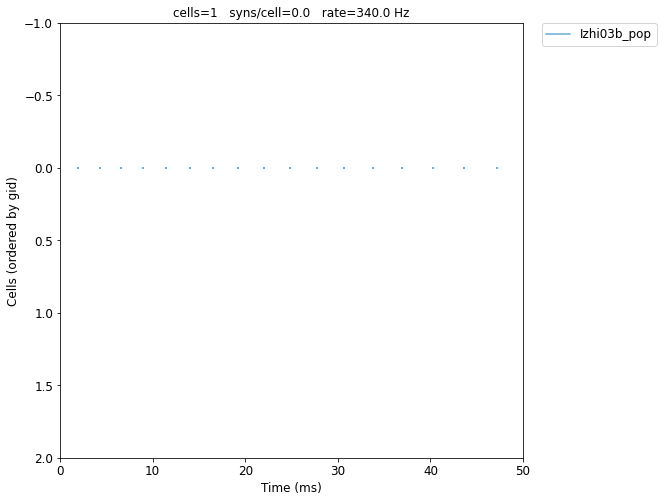

Plotting recorded cell traces ... cell


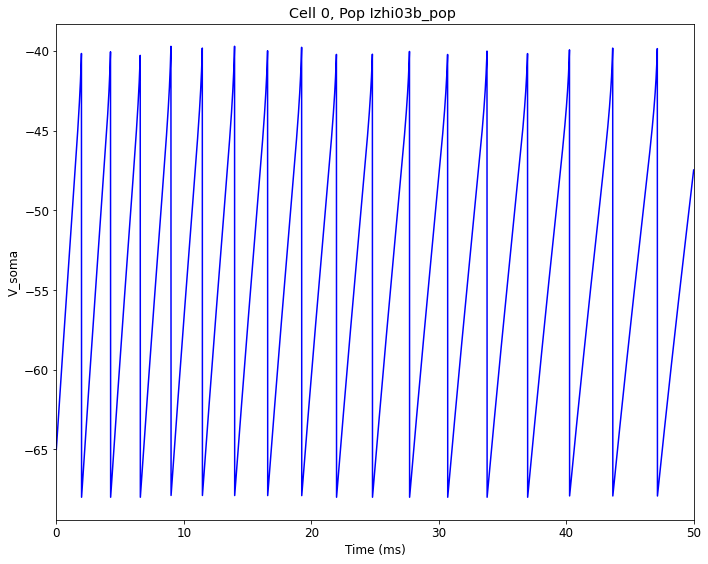

  Done; plotting time = 0.33 s

Total time = 0.35 s

End time:  2021-08-09 22:47:58.514610


In [21]:
from netpyne import specs, sim
%matplotlib inline

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

## Population parameters
netParams.popParams['Izhi03b_pop'] = {'cellType': 'PYR', 'numCells': 1, 'cellModel': 'Izh2003b'}

### Izhi2003b (section voltage)
netParams.importCellParams(
    label='PYR_Izhi03b_rule', 
    conds={'cellType': 'PYR', 'cellModel':'Izh2003b'},
    fileName='izhi2003Wrapper.py', 
    cellName='IzhiCell',  
    cellArgs={'type':'tonic spiking'},
    )

netParams.renameCellParamsSec('PYR_Izhi03b_rule', 'sec', 'soma')  # rename imported section 'sec' to 'soma'


## Synaptic mechanism parameters
# netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 1.0, 'tau2': 2.0, 'e': 0}  # synapse


# # Stimulation parameters
# netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 20, 'noise': 0.0}
# netParams.stimTargetParams['bg1'] = {'source': 'bkg', 'conds': {'cellType': 'PYR', 'cellModel': ['Izh2003b']}, 'weight': 0.0005, 'delay': 5, 'sec': 'soma'}


# ## Connectivity params
# netParams.connParams['recurrent'] = {
#     'preConds': {'cellType': 'PYR'}, 
#     'postConds': {'cellType': 'PYR'},  #  PYR -> PYR random
#     'connFunc': 'convConn',           # connectivity function (random)
#     'convergence': 'uniform(0,10)',   # max number of incoming conns to cell
#     'weight': 0.0001,                  # synaptic weight
#     'delay': 5,                       # transmission delay (ms)
#     'sec': 'soma'}                    # section to connect to



netParams.stimSourceParams['IClamp1'] = {'type': 'IClamp', 'del': 0, 'dur': 200, 'amp': 0.01}
netParams.stimTargetParams['IClamp1->Izhi03b'] = {'source': 'IClamp1', 'sec':'soma', 'loc': 0.5, 'conds': {'pop':'Izhi03b_pop'}}

netParams.defaultThreshold = netParams.cellParams['PYR_Izhi03b_rule']['secs']['soma']['pointps']['Izhi2003b_0']['thresh']
print('\n ---------------------------\n  Threshold = %f mV \n ---------------------------' % netParams.defaultThreshold)
print('parameters',netParams.cellParams['PYR_Izhi03b_rule']['secs']['soma']['pointps']['Izhi2003b_0'].keys())
# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration
simConfig.duration = 5*1e1          # Duration of the simulation, in ms
simConfig.dt = 0.01                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma': {'sec': 'soma', 'loc': 0.5, 'var': 'v'}}
simConfig.recordStep = 0.01            # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output' # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file
simConfig.analysis['plotRaster'] = {'orderInverse': True, 'saveFig': 'tut_import_raster.png'}           
simConfig.analysis['plotTraces'] = {'include': ['Izhi03b_pop']}            


# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)


In [6]:
!rm -r x86_64

In [7]:
sim.net.pops['Izhi03b_pop'].tags

{cellType: 'PYR', numCells: 1, cellModel: 'Izh2003b', pop: 'Izhi03b_pop'}

In [22]:
netParams.cellParams['PYR_Izhi03b_rule']['secs']['soma']['pointps']['Izhi2003b_0']

{mod: 'Izhi2003b', loc: 0.5, a: 0.02, b: 0.2, c: -68.0, d: 60.0, f: 5.0, g: 140.0, Iin: 509.7, thresh: -40.0, fflag: 1.0, cellid: -1.0, _repr_mimebundle_: {}}